INTRODUCTION and HYPOTHESIS

In this exercise, we are exploring two data sets, one on share of overdrinking among adults and the second one on internet usage. 

We want to test the hypothesis that heavy alcohol consumption and internet use are related , that high use of internet has a direct influence on internt use and vise versa. 

To support our hypothesis, we are citing the research by Linda.et.al who poits that 'Heavier social media use was associated with more frequent alcohol consumption among young people in the United Kingdom'.

The research can be found here: https://onlinelibrary.wiley.com/doi/10.1111/add.15482

In another paper, Brunborg, et.al also concludes that 'The more time Norwegian adolescents aged 13–15 years spend on SoMe, the greater is their subsequent increase in alcohol use over time'.

The research can be found here: https://www.sciencedirect.com/science/article/pii/S0306460322000600

Our analysis will attempt to confirm  these theories based on data from Our World in Data. The Data focuses on counties in Europe and in the year 2016. 

HYPOTHESIS
 H0 : There is no significant relationship between internet use and and heavy alcohol consumption. 
 H1: There is a relationship between internet use and heavy alchol consumption. 

In [50]:
#Import Needed Libraries

import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [51]:
#Import the data
alcohol_use = pd.read_csv('/Users/faridaadamu/Documents/Alcohol_Internet_Use/drinkers-had-a-heavy-session-in-past-30-days.csv')
internet_use = pd.read_csv('/Users/faridaadamu/Documents/Alcohol_Internet_Use/daily-time-spent-on-the-internet-by-young-people.csv')

In [52]:
alcohol_use.head(1)

,Entity,Code,Year,"Indicator:Alcohol, heavy episodic drinking (15+), drinkers only, past 30 days (%) - Sex:Both sexes"
0,Afghanistan,AFG,2016,2.0


In [53]:
internet_use.head(1)

,Entity,Code,Year,Daily time spent on the internet by young people (hours)
0,Austria,AUT,2016,2.916667


In [54]:
#Since we have since the shape of our data, we will join them based on the shared parameter 'entity'
ach_int_use = alcohol_use.merge(internet_use, on='Entity')
ach_int_use

,Entity,Code_x,Year_x,"Indicator:Alcohol, heavy episodic drinking (15+), drinkers only, past 30 days (%) - Sex:Both sexes",Code_y,Year_y,Daily time spent on the internet by young people (hours)
0,Austria,AUT,2016,42.5,AUT,2016,2.916667
1,Belgium,BEL,2016,42.1,BEL,2016,3.950000
2,Czechia,CZE,2016,55.9,CZE,2016,4.033333
3,Estonia,EST,2016,57.4,EST,2016,5.283333
4,Finland,FIN,2016,39.0,FIN,2016,3.366667
5,France,FRA,2016,41.5,FRA,2016,4.050000
6,Germany,DEU,2016,43.1,DEU,2016,4.500000
7,Hungary,HUN,2016,50.3,HUN,2016,3.816667
8,Iceland,ISL,2016,39.2,ISL,2016,5.333333
9,Ireland,IRL,2016,46.5,IRL,2016,3.733333


In [55]:
#We will rename the columns to reduce clutter on the dataframe. 
ach_int_use.rename(columns = {'Code_x':'Entity_code', 'Indicator:Alcohol, heavy episodic drinking (15+), drinkers only, past 30 days (%) - Sex:Both sexes':'Heavy_Drinking','Daily time spent on the internet by young people (hours)':'Internet_Usage'}, inplace = True)
ach_int_use

,Entity,Entity_code,Year_x,Heavy_Drinking,Code_y,Year_y,Internet_Usage
0,Austria,AUT,2016,42.5,AUT,2016,2.916667
1,Belgium,BEL,2016,42.1,BEL,2016,3.950000
2,Czechia,CZE,2016,55.9,CZE,2016,4.033333
3,Estonia,EST,2016,57.4,EST,2016,5.283333
4,Finland,FIN,2016,39.0,FIN,2016,3.366667
5,France,FRA,2016,41.5,FRA,2016,4.050000
6,Germany,DEU,2016,43.1,DEU,2016,4.500000
7,Hungary,HUN,2016,50.3,HUN,2016,3.816667
8,Iceland,ISL,2016,39.2,ISL,2016,5.333333
9,Ireland,IRL,2016,46.5,IRL,2016,3.733333


In [56]:
#we will drop some repetitive columns 
ach_int_use1 = ach_int_use.drop(['Code_y', 'Year_y'], axis=1)
ach_int_use1

,Entity,Entity_code,Year_x,Heavy_Drinking,Internet_Usage
0,Austria,AUT,2016,42.5,2.916667
1,Belgium,BEL,2016,42.1,3.950000
2,Czechia,CZE,2016,55.9,4.033333
3,Estonia,EST,2016,57.4,5.283333
4,Finland,FIN,2016,39.0,3.366667
5,France,FRA,2016,41.5,4.050000
6,Germany,DEU,2016,43.1,4.500000
7,Hungary,HUN,2016,50.3,3.816667
8,Iceland,ISL,2016,39.2,5.333333
9,Ireland,IRL,2016,46.5,3.733333


In [57]:
#the heavy drinking column is in percentage, we will covert this to decimal
ach_int_use1['Heavy_Drinking'] = ach_int_use1['Heavy_Drinking'].div(100)


In [58]:
#the internet usage column is in hours, we will covert this to minutues
ach_int_use1["Internet_Usage"] = 60 * ach_int_use1["Internet_Usage"]

In [59]:
ach_int_use1

,Entity,Entity_code,Year_x,Heavy_Drinking,Internet_Usage
0,Austria,AUT,2016,0.425,175.0
1,Belgium,BEL,2016,0.421,237.0
2,Czechia,CZE,2016,0.559,242.0
3,Estonia,EST,2016,0.574,317.0
4,Finland,FIN,2016,0.390,202.0
5,France,FRA,2016,0.415,243.0
6,Germany,DEU,2016,0.431,270.0
7,Hungary,HUN,2016,0.503,229.0
8,Iceland,ISL,2016,0.392,320.0
9,Ireland,IRL,2016,0.465,224.0


In [67]:
#We will use .decribe to generate a summary statistics.

ach_int_use1.describe()

,Heavy_Drinking,Internet_Usage
count,22.000000,22.000000
mean,0.438545,260.136364
std,0.080414,55.723207
min,0.311000,165.000000
25%,0.385500,221.000000
50%,0.418000,242.500000
75%,0.493500,313.500000
max,0.623000,362.000000


In [60]:
#we want to ensure we have the appropriate data types before we start our analysis 

ach_int_use1.dtypes

Entity             object
Entity_code        object
Year_x              int64
Heavy_Drinking    float64
Internet_Usage    float64
dtype: object

In [61]:
#ach_int_use1['Year_x'].astype('object')
ach_int_use1.Year_x = ach_int_use1.Year_x.astype('str')

In [62]:
ach_int_use1.dtypes

Entity             object
Entity_code        object
Year_x             object
Heavy_Drinking    float64
Internet_Usage    float64
dtype: object

We will do a scatter plot as our first test of the relationship between internet use and alcohol consumption.

<AxesSubplot:xlabel='Internet_Usage', ylabel='Heavy_Drinking'>

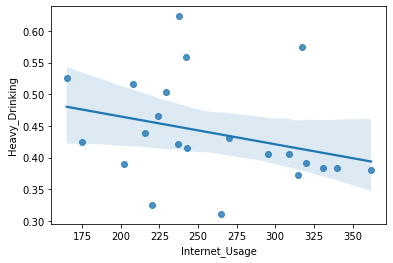

In [63]:
#we create a scatter plot to show how both variables affect each other. 
sns.regplot(x="Internet_Usage", y="Heavy_Drinking", data=ach_int_use1)

We use the Pearson's correlation to test the strength and direction of the linear relationship between heavy drinking and internet use. We chose this test because we are working with two continuous variables.

In [77]:

corrM =ach_int_use1.corr(method ='pearson')

,Heavy_Drinking,Internet_Usage
Heavy_Drinking,1.000000,-0.303886
Internet_Usage,-0.303886,1.000000


Text(0.5, 1.0, 'Correlation matrix for Alcohol and Internet Use ')

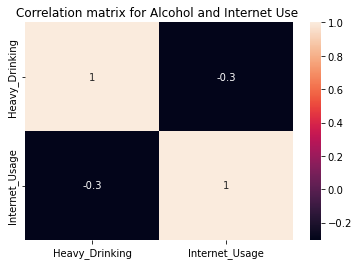

In [85]:
sns.heatmap(corrM, annot = True)

plt.title("Correlation matrix for Alcohol and Internet Use ")



We see that there is weak negative correlation between internet usage and heavy drinking. 
We will conduct one final test to help us deterine whether we will not reject the null hypothesis. 

In [75]:
import scipy.stats as stats
import math

In [78]:
from scipy.stats.stats import pearsonr


In [81]:
x = ach_int_use["Heavy_Drinking"]
y = ach_int_use["Internet_Usage"]

In [82]:
pearsonr(x,y)

(-0.3038864961088792, 0.16915377801563286)

In [83]:
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=-0.035096457468953984, intercept=5.874745250047582, rvalue=-0.303886496108879, pvalue=0.169153778015633, stderr=0.024603495091978962, intercept_stderr=1.0961530431993731)

Since the p-value is 0.1691, which is greater that or given value -0.30 (which signifies a weak negative relationship), we do not reject the null hypothesis.

There is not sufficient evidence to conclude that there is a significant relationship between the variables.